In [2]:
# 先导入pandas库
import pandas as pd
# 读入数据，假设数据存放在当前目录下的titanic.csv文件中
data = pd.read_csv("titanic.csv")

In [3]:
# 显示前5行数据
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 显示行数和列数
data.shape

(891, 12)

In [5]:
# 显示所有列的数据类型等信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


       PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    0.647587   29.361582   
std     257.353842    0.486592    0.836071    0.477990   13.019697   
min       1.000000    0.000000    1.000000    0.000000    0.420000   
25%     223.500000    0.000000    2.000000    0.000000   22.000000   
50%     446.000000    0.000000    3.000000    1.000000   28.000000   
75%     668.500000    1.000000    3.000000    1.000000   35.000000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare  Embarked_Q  Embarked_S  
count  891.000000  891.000000  891.000000  891.000000  891.000000  
mean     0.523008    0.381594   32.204208    0.086420    0.725028  
std      1.102743    0.806057   49.693429    0.281141    0.446751  
min      0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000

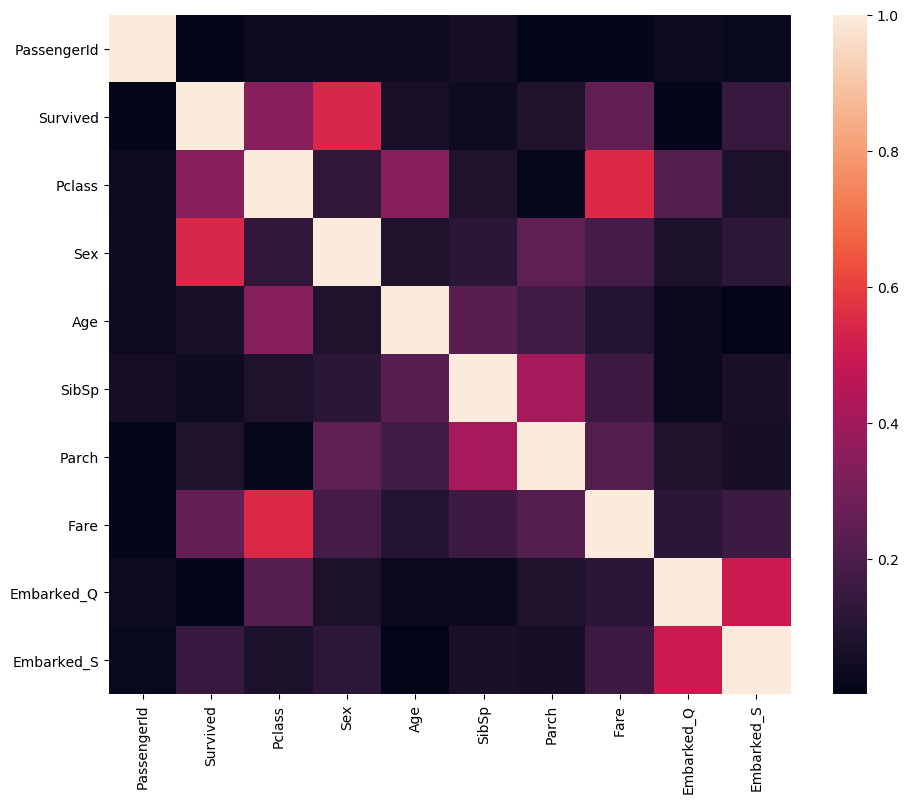

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns  #作图
# 显示数值型特征列的描述统计信息
print(data.describe())  

data_corr = data.corr(method='pearson') #生成相关性矩阵
print(data_corr)      #显示相关性矩阵，越接近于0，相关性越弱，绝对值越大，相关性越强（正相关或者负相关），相关性强，则对预测的作用越大
data_corr = data_corr.abs()
plt.figure(figsize=(11, 9),dpi=100)   #生成画布
sns.heatmap(data=data_corr,           )  #绘制热力图

In [7]:
# 显示类别型特征列的所有取值及出
现次数
data.Embarked.value_counts()  #默认按照数量从多到少的顺序排列

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [28]:
# 用中值填充Age列的缺失值
print(data.Age.mean(),data.Age.median())  #均值和中值
data.Age.fillna(data.Age.median(), inplace=True)

29.36158249158249 28.0


In [10]:
# 用最频繁的值’S’填充Embarked列的缺失值
data.Embarked.fillna('S', inplace=True)

In [11]:
# 将Sex列的值转换为0和1
data.Sex = data.Sex.map({'female':0, 'male':1})

In [12]:
# 将Embarked列的值转换为独热编码，drop_first=True将独热编码的第一个值去掉
embarked_d = pd.get_dummies(data.Embarked, prefix='Embarked', drop_first=True)
# 将独热编码后的多个列，即embarked_d，拼接到原数据中
data = pd.concat([data, embarked_d], axis=1)

In [29]:
# 生成X和y
feature_cols = ['Pclass', 'Sex', 'Age', 'Embarked_Q', 'Embarked_S']  #提取认为对于分类有用的特征列
X = data[feature_cols]
y = data.Survived

In [30]:
# 划分训练集和测试集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### 决策树

In [32]:
# 用GridSearchCV方法训练决策树模型，并选择最优的决策树深度
from sklearn.model_selection import GridSearchCV   #网格搜索交叉验证，在给定的参数中自动找出最有的参数，如果是多个参数，则类似于网格
from sklearn.tree import DecisionTreeClassifier

parameters = {'max_depth':[1, 3, 5, 10,15, 20, 30]}
tree_clf = GridSearchCV(DecisionTreeClassifier(), parameters, scoring='accuracy') #模型、参数、评价指标（要找出最优参数，基于什么指标判断最优）
tree_clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 3, 5, 10, 15, 20, 30]},
             scoring='accuracy')

In [33]:
# 显示网格搜索到的最佳决策树深度和得分
print(tree_clf.best_params_)
print(tree_clf.best_score_)

{'max_depth': 10}
0.8267096774193549


In [36]:
# 用上面得到的最佳决策树预测测试数据
y_pred = tree_clf.predict(X_test)


In [16]:
# 输出对测试数据预测的精度、查准率、查全率和F1分数
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(accuracy_score(y_test, y_pred))    #准确率
print(classification_report(y_test, y_pred))  #输入分类报告，精确度（查准率）、召回率（查全率）、F1分数（调和平均）

0.791044776119
             precision    recall  f1-score   support

          0       0.80      0.88      0.84       164
          1       0.77      0.65      0.71       104

avg / total       0.79      0.79      0.79       268



### 随机森林

In [17]:
# 用GridSearchCV方法训练随机森林模型，并选择最优的决策树个数
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators':[20, 30, 50, 100, 150, 200, 300, 400]}
forest_clf = GridSearchCV(RandomForestClassifier(oob_score=True),
parameters, scoring='accuracy')  #oob袋外准确率
forest_clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [20, 30, 50, 100, 150, 200, 300, 400]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [18]:
# 显示网格搜索到的最佳森林的决策树个数、得分和袋外错误率
print(forest_clf.best_params_)
print(forest_clf.best_score_)
print(forest_clf.best_estimator_.oob_score_)

{'n_estimators': 30}
0.821829855538
0.802568218299


In [19]:
# 用上面得到的最佳森林预测测试数据
y_pred = forest_clf.predict(X_test)

In [20]:
# 输出对测试数据预测的精度、查准率、查全率和F1分数
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.80223880597
             precision    recall  f1-score   support

          0       0.82      0.87      0.84       164
          1       0.77      0.70      0.73       104

avg / total       0.80      0.80      0.80       268



 #AdaBoost

In [21]:
# 用GridSearchCV方法训练AdaBoost模型，并选择最优的决策树个数和学习率
from sklearn.ensemble import AdaBoostClassifier

parameters = {'n_estimators':[20, 50, 100, 200, 300, 400],
              'learning_rate':[0.1, 0.01, 0.001]}
ada_clf = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth=3, max_features=3)),
                        param_grid=parameters, scoring='accuracy')  #使用对ADABoost算法进行网格搜索，而AdaBoost算法的基学习器是决策树
ada_clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [20, 50, 100, 200, 300, 400], 'learning_rate': [0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [22]:
# 显示网格搜索到的最佳AdaBoost模型的决策树个数、学习率和得分
print(ada_clf.best_params_)
print(ada_clf.best_score_)

{'learning_rate': 0.1, 'n_estimators': 20}
0.815409309791


In [23]:
# 用上面得到的最佳AdaBoost模型预测测试数据
y_pred = ada_clf.predict(X_test)

In [24]:
# 输出对测试数据预测的精度、查准率、查全率和F1分数
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.809701492537
             precision    recall  f1-score   support

          0       0.79      0.95      0.86       164
          1       0.87      0.60      0.71       104

avg / total       0.82      0.81      0.80       268



### 梯度提升树

In [25]:
# 用GridSearchCV方法训练梯度提升树模型，并选择最优的决策树个数、学习率、子采样、决策树的最大深度、最大特征数
from sklearn.ensemble import GradientBoostingClassifier

parameters = {'n_estimators':[20, 50, 100, 200, 300, 400],
              'learning_rate':[0.1, 0.01, 0.001],
              'subsample':[0.5, 0.6, 0.8],
              'max_depth':[1, 2, 3],
              'max_features':[3, 4, 5]}   #这里要搜索的参数就不是一个了
gtb_clf = GridSearchCV(GradientBoostingClassifier(),param_grid=parameters, scoring='accuracy')
gtb_clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [20, 50, 100, 200, 300, 400], 'learning_rate': [0.1, 0.01, 0.001], 'subsample': [0.5, 0.6, 0.8], 'max_depth': [1, 2, 3], 'max_features': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [26]:
# 显示网格搜索到的最佳梯度提升树模型的参数和得分
print(gtb_clf.best_params_)
print(gtb_clf.best_score_)

{'learning_rate': 0.1, 'max_depth': 2, 'max_features': 3, 'n_estimators': 300, 'subsample': 0.5}
0.836276083467


In [27]:
# 用上面得到的最佳梯度提升树模型预测测试数据
y_pred = gtb_clf.predict(X_test)

In [28]:
# 输出对测试数据预测的精度、查准率、查全率和F1分数
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.798507462687
             precision    recall  f1-score   support

          0       0.80      0.90      0.84       164
          1       0.80      0.64      0.71       104

avg / total       0.80      0.80      0.79       268



### 投票聚合模型

In [40]:
# 将前面训练得到的最好随机森林模型和梯度提升树模型用软投票方式聚合在一起
from sklearn.ensemble import VotingClassifier

vote_clf = VotingClassifier(estimators=[('rf', forest_clf.best_estimator_), ('gtb', gtb_clf.best_estimator_)], voting='soft')
vote_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_we...      presort='auto', random_state=None, subsample=0.5, verbose=0,
              warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [41]:
# 用投票聚合模型预测测试数据
y_pred = vote_clf.predict(X_test)

In [42]:
# 输出对测试数据预测的精度、查准率、查全率和F1分数
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.813432835821
             precision    recall  f1-score   support

          0       0.81      0.91      0.86       164
          1       0.82      0.66      0.73       104

avg / total       0.81      0.81      0.81       268

